In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('advertising.csv')
data.head()

X_labels = ['TV','Radio']

X_data = data[X_labels]
Y_data = data['Sales']
data


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
X_data.shape, Y_data.shape

((200, 2), (200,))

In [4]:
##spli data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((160, 2), (40, 2), (160,), (40,))

In [5]:
##linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, Y_train)

In [6]:
print('B0: ', model.intercept_)
print('B1: ', model.coef_)

B0:  4.376730365136108
B1:  [0.05483979 0.11072805]


In [7]:
# Model eq : Sales = 4.63 + 0.054 * TV + 0.107 * radio

In [8]:
test = [[300, 50]]
model.predict(test)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([26.36507085])

In [9]:
#compute training accuracy
train_pred = model.predict(X_train)
print('first 20 prdicted: ', train_pred[:20])
print()
print('first 20 Original: ', Y_train[:20].values)

first 20 prdicted:  [24.65067329 10.56514338 24.97647077 16.40843012 23.54486063 21.14140089
 13.1387433  18.16669055 22.17760832  9.52173738  7.67722413  8.08987663
 10.1423387  17.41782881  8.59892008 13.5938407  19.21617765 21.6000311
  6.11124052 15.60062166]

first 20 Original:  [23.8 13.7 27.  17.2 20.7 20.  13.2 16.  22.2  8.   7.6  8.7  8.7 18.
  8.5 12.2 20.7 20.9  7.3 16.7]


In [10]:
##raining and Test Accuracy
from sklearn.metrics import r2_score

test_pred = model.predict(X_test)
print('Model accuracy on training data: ', r2_score(train_pred, Y_train.values))
print('Model accuracy on test data: ', r2_score(test_pred, Y_test.values))

Model accuracy on training data:  0.898292683263231
Model accuracy on test data:  0.8702048874685541


### Cross Validation

In [11]:
##To evvaluate how well a model fitts
##To avoid overfitting
##to select the best hyper parrameter

#### Approach to Cross validation

In [12]:
##Split your data into k equal folds. where k can be any number usually between 5 and 10
##Stack k-1 folds together
##Buld nodel on any k-1 folds and evaluate on the remaining one
##Do this for all the folds
##Store accuracy. You can calculate average to see the average accuracy

In [13]:
model = lm.fit(X_train, Y_train) #training

In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, X_data, Y_data, cv = 5)

In [15]:
print('Mean model accuracy: ', scores.mean())

Mean model accuracy:  0.8958535029714983


### Plotting Model line

In [16]:
x1 = X_data['TV']
x_lst = []
for i in x1:
    x_lst.append([i])
x_lst

lm1 = LinearRegression()
model2 = lm1.fit(x_lst, Y_data)
pred = model2.predict(x_lst)

Text(0.5, 1.0, 'Tv vs Sales')

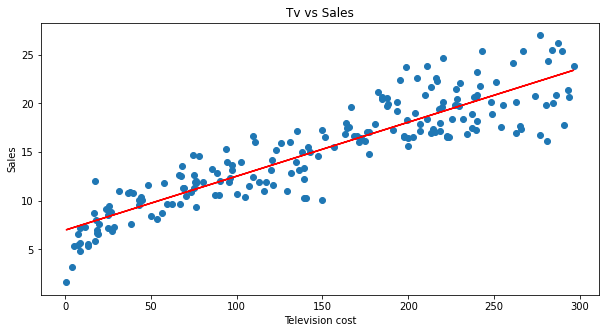

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(x1, Y_data, 'o')
plt.plot(x1, pred, 'r')
plt.xlabel('Television cost')
plt.ylabel('Sales')
plt.title('Tv vs Sales')